In [5]:
import os
from scipy import misc
import json
import shutil
from matplotlib import pyplot as plt
import numpy as np
import numpy.ma as ma
%matplotlib inline

In [21]:
animal = "sealion"

In [22]:
raw_data_dir = 'doodles/' + animal
data_dir_root = 'data_' + animal

if os.path.isdir(data_dir_root):
    shutil.rmtree(data_dir_root)
os.mkdir(data_dir_root)

img_dir = os.path.join(data_dir_root, 'images')
label_dir = os.path.join(data_dir_root, 'labels')
label_img_dir = os.path.join(data_dir_root, 'label_images')
os.mkdir(img_dir)
os.mkdir(label_dir)
os.mkdir(label_img_dir)

In [23]:
conf_path = os.path.join(raw_data_dir, 'conf.json')
with open(conf_path) as f:
    conf = json.loads(f.read())
label_num = conf['obj_num']

In [24]:
# label_num = 4
records = []
img_names = os.listdir(raw_data_dir)
for img_name in img_names:
    # only fetch the original image
    if "mask" in img_name or "json" in img_name or "result" in img_name:
        continue
    
    img_path = os.path.join(raw_data_dir, img_name)
    img = misc.imread(img_path)
    label_data = np.ones(img.shape[0:2], dtype='byte')
    for label_idx in range(label_num):
        mask_path = img_path.replace("png", "mask." + str(label_idx) + ".png")
        cur_label_img = misc.imread(mask_path, mode='L')
        cur_label_img = np.minimum(cur_label_img, np.ones(cur_label_img.shape))
        label_data_mx = ma.masked_array(label_data, mask=cur_label_img)
        # label 0: don't care
        # label 1: background
        # label 2 and above: objects
        # Thus, the object label should start from 2
        ma.set_fill_value(label_data_mx, label_idx + 2)
        label_data = label_data_mx.filled()
    # save results to file
    new_img_path = os.path.join(img_dir, img_name)
    misc.imsave(new_img_path, img)
    label_img_path = os.path.join(label_img_dir, img_name)
    misc.imsave(label_img_path, label_data)
    label_path = os.path.join(label_dir, img_name).replace('.png', '.dat')
    label_file = open(label_path, "wb")
    byte_data = bytearray(label_data)
    label_file.write(byte_data)
    label_file.close()
    
    records.append(new_img_path + "\n")
#     break

In [25]:
# split into training set and test set
test_ratio = 0.1
total_num = len(records)
test_num = int(test_ratio * total_num)
train_num = total_num - test_num
train_records = records[0:train_num]
test_records = records[train_num:]

In [26]:
# save to text file
all_out_file = open(animal + "_all.txt", "w")
for record in records:
    all_out_file.write(record)
all_out_file.close()

train_out_file = open(animal + "_train.txt", "w")
for record in train_records:
    train_out_file.write(record)
train_out_file.close()

test_out_file = open(animal + "_test.txt", "w")
for record in test_records:
    test_out_file.write(record)
test_out_file.close()

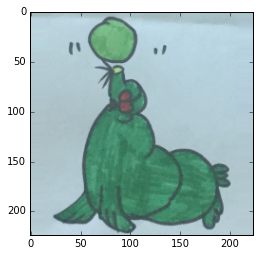

In [4]:
plt.imshow(img)

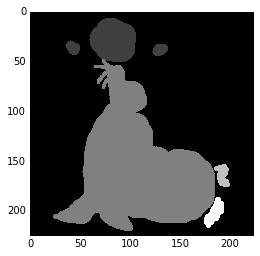

In [5]:
plt.imshow(label_data, cmap='gray')